Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [4]:
# cell for imports. All imports must go here.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [2]:
df = pd.read_csv("train.csv")
df_info = pd.DataFrame({
    'Column Index': range(len(df.columns)),
    'Column Name': df.columns,
    'Non-Null Count': df.notnull().sum().values,
    'Data Type': df.dtypes.values
})
print("\nІнформація про кожну колонку:")
print(df_info.to_string(index=False))
df.head()


Інформація про кожну колонку:
 Column Index Column Name  Non-Null Count Data Type
            0 PassengerId             891     int64
            1    Survived             891     int64
            2      Pclass             891     int64
            3        Name             891    object
            4         Sex             891    object
            5         Age             714   float64
            6       SibSp             891     int64
            7       Parch             891     int64
            8      Ticket             891    object
            9        Fare             891   float64
           10       Cabin             204    object
           11    Embarked             889    object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

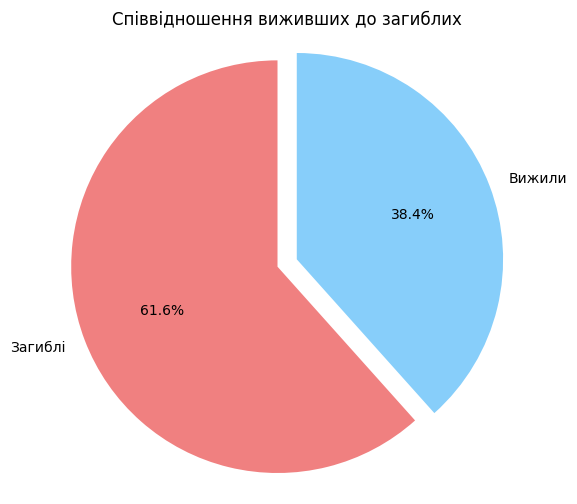

In [7]:
survived_counts = df['Survived'].value_counts()
labels = ['Загиблі', 'Вижили']
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)
plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Співвідношення виживших до загиблих')
plt.axis('equal')
plt.show()

Pie chart показує,що більшість пасажирів Титаніка не вижили

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


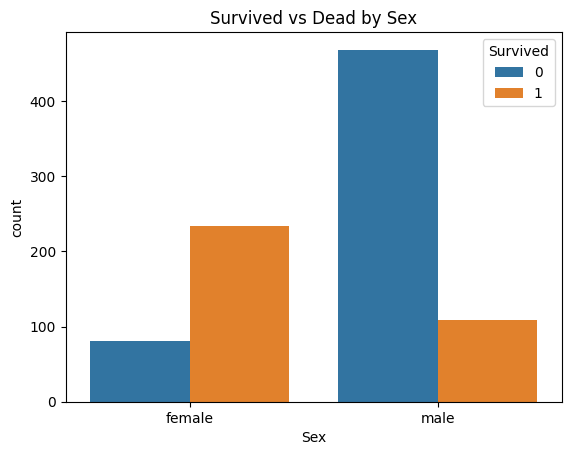

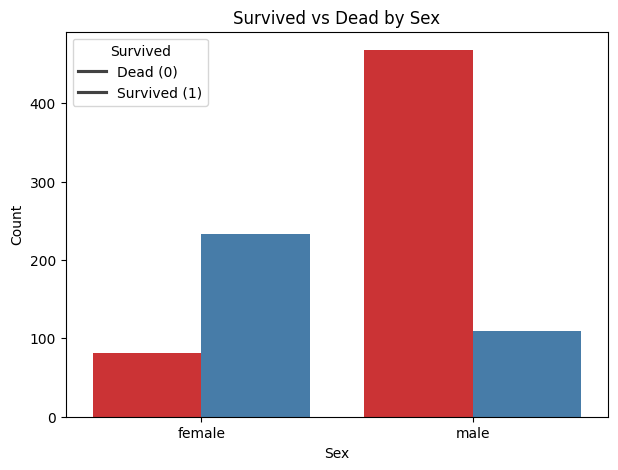

In [9]:
grouped = df.groupby(['Sex', 'Survived'], as_index=False).size()
plt.figure(figsize=(7, 5))
sns.barplot(data=grouped, x='Sex', y='size', hue='Survived', palette='Set1')
plt.title('Survived vs Dead by Sex')
plt.ylabel('Count')
plt.xlabel('Sex')
plt.legend(title='Survived', labels=['Dead (0)', 'Survived (1)'])
plt.show()

На графіку добре видно, що більшість жінок вижили. Чоловіки у більшості випадків загинули.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

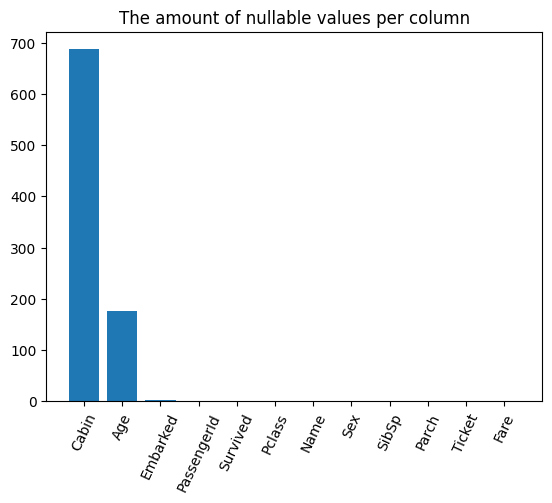

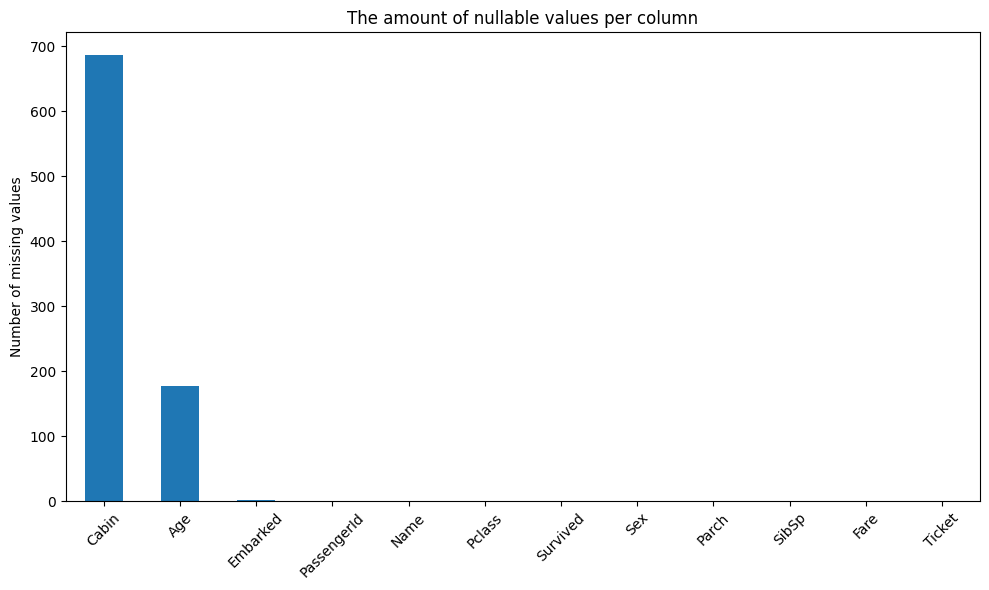

In [10]:
missing_values = df.isnull().sum()
plt.figure(figsize=(10, 6))
missing_values.sort_values(ascending=False).plot(kind='bar')
plt.title('The amount of nullable values per column')
plt.ylabel('Number of missing values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Колонка Cabin має занадто багато пропусків. Age має суттєву кількість пропусків, але її можна врятувати заповненням. Embarked легко піддається очищенню — 2 значення можна заповнити.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

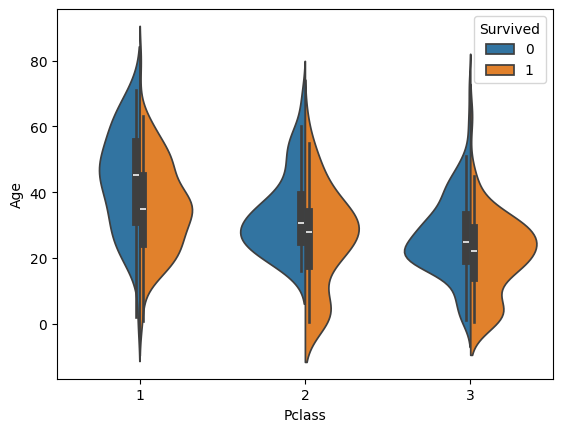

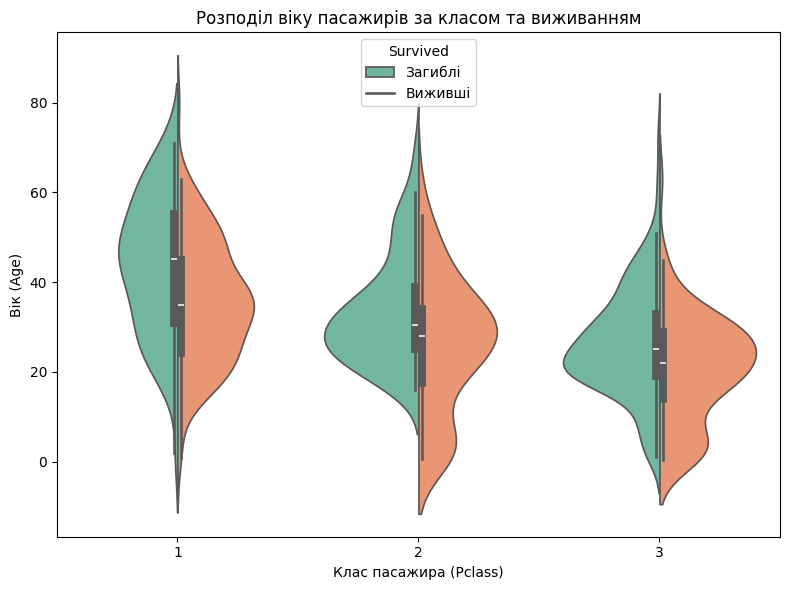

In [11]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Pclass', y='Age', hue='Survived', split=True, palette='Set2')
plt.title('Розподіл віку пасажирів за класом та виживанням')
plt.xlabel('Клас пасажира (Pclass)')
plt.ylabel('Вік (Age)')
plt.legend(title='Survived', labels=['Загиблі', 'Виживші'])
plt.tight_layout()
plt.show()

Графік показує важливу залежність: пасажирський клас і вік мали значний вплив на шанси виживання. Особливо чітко це видно в 1-му класі — пасажири були старші, але й виживання було вищим.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


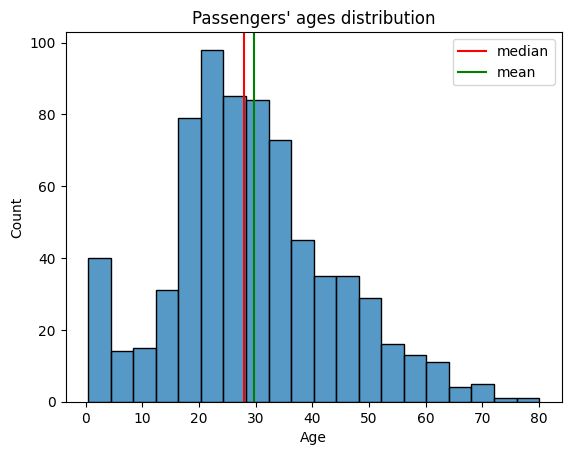

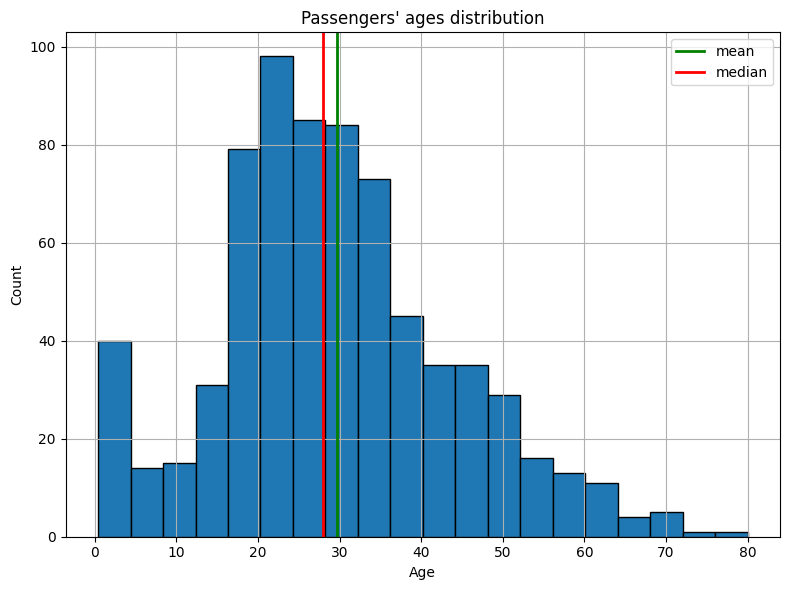

In [12]:
plt.figure(figsize=(8, 6))
df['Age'].hist(bins=20, edgecolor='black')
plt.axvline(df['Age'].mean(), color='green', linestyle='-', linewidth=2, label='mean')
plt.axvline(df['Age'].median(), color='red', linestyle='-', linewidth=2, label='median')

plt.title("Passengers' ages distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

Більшість пасажирів були молодими людьми (20–35 років). Наявність правої асиметрії (mean > median) може впливати на статистичні моделі.



7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

"Чи впливає клас квитка та стать пасажира на шанс вижити?"

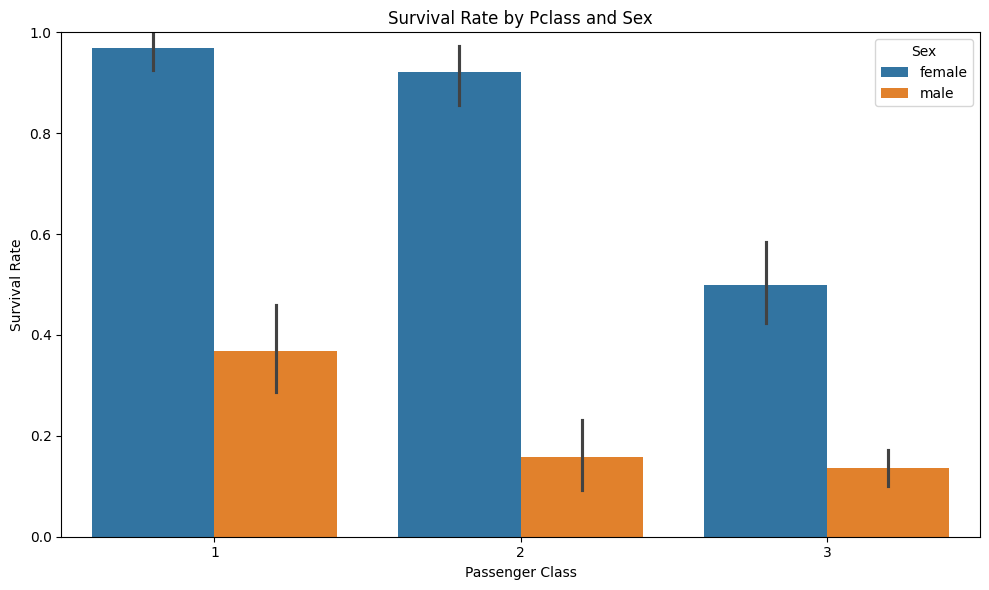

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex')
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.ylim(0, 1)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

Жінки в усіх класах мали вищий шанс вижити, ніж чоловіки. В 1 класі жінки виживали у більшості випадків. В 3 класі жінки також мали перевагу, хоч і не таку високу. Чоловіки з 3 класу майже не мали шансів на порятунок — дуже низький рівень виживання. 1 клас мав найвищу виживаність загалом, незалежно від статі.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

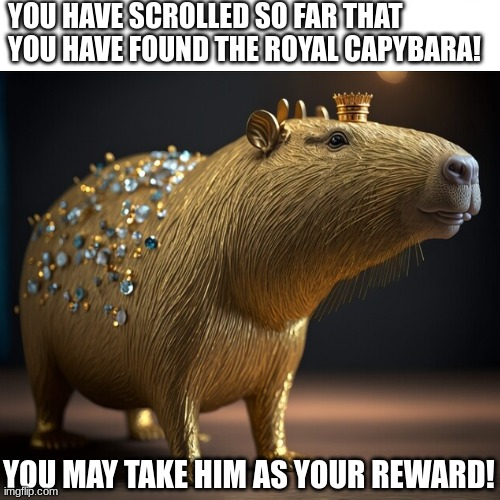